<a href="https://colab.research.google.com/github/ParnaChat/Computer-Vision-Diabetic-Retenopathy/blob/main/Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem**
Identiy Diabetic Retinopathy (DR) from images acurately.
Developing and implementing technologies or services that enable early detection and screening of diabetic retinopathy can be a lucrative business opportunity. This could involve creating affordable and accessible screening tools or telemedicine solutions. Develop a model using health case data to forecast disease, so that it could aid resource allocation and proactive healthcase measure.

# **Importing the dataset**
As the dataset contains images, it needs to be first convert into a csv file format which can be further used for analysis.

In [ ]:
import os
import csv

# Define the path to the root directory containing class folders
root_dir = '/content/drive/MyDrive/Diabetic Retinopathy'

In [ ]:
# Create a CSV file to store file paths and labels
csv_image_path = 'dataset.csv'

with open(csv_image_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['image_path', 'label'])

    # Iterate through each class folder
    for label in os.listdir(root_dir):
        label_path = os.path.join(root_dir, label)

        # Check if the item in the directory is a subdirectory (assuming only folders are class labels)
        if os.path.isdir(label_path):
            # Iterate through images in the class folder
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                csv_writer.writerow([file_path, label])


In [ ]:
# print the path of the new csv data file created
print(f"CSV file created at: {csv_image_path}")

CSV file created at: dataset.csv


In [ ]:
#Basic libraries
import numpy as np
import pandas as pd

In [ ]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Add an additional column, mapping to the type
df = pd.read_csv(r'/content/dataset.csv')

In [ ]:
# Creating a column depicting whether the image is of a eye with DR or not
diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

In [ ]:
# Creating a column depicting the category of DR corresponding to the image of an eye
diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}

In [ ]:
# mapping the columns created into the data set
df['binary_type'] =  df['label'].map(diagnosis_dict_binary.get)
df['type'] = df['label'].map(diagnosis_dict.get)

In [ ]:
df.head()

,image_path,label,binary_type,type
0,/content/drive/MyDrive/Diabetic Retinopathy/1/...,1,DR,Mild
1,/content/drive/MyDrive/Diabetic Retinopathy/1/...,1,DR,Mild
2,/content/drive/MyDrive/Diabetic Retinopathy/1/...,1,DR,Mild
3,/content/drive/MyDrive/Diabetic Retinopathy/1/...,1,DR,Mild
4,/content/drive/MyDrive/Diabetic Retinopathy/1/...,1,DR,Mild


In [ ]:
# To find the dimension of the data
df.shape

(35136, 4)

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35136 entries, 0 to 35135
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   35136 non-null  object
 1   label        35136 non-null  int64 
 2   binary_type  35136 non-null  object
 3   type         35136 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB
None


# **Exploratory data analysis**

<Axes: >

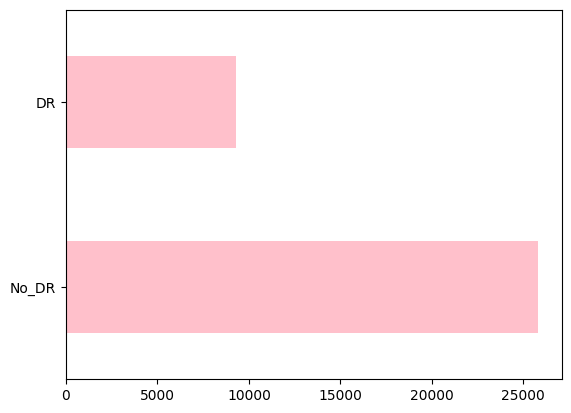

In [ ]:
df['binary_type'].value_counts().plot(kind='barh', color='pink')

From the above bar plot, it can be seen that the data contain most of the patients with no risks of diabetic retinopathy (DR).

<Axes: >

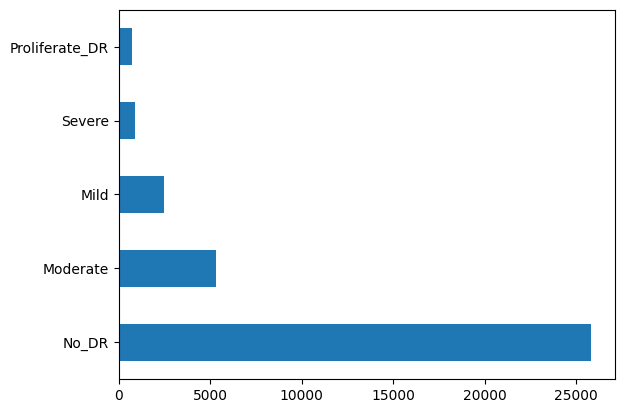

In [ ]:
df['type'].value_counts().plot(kind='barh')

From the above bar plot, it can be seen that the data contain most of the DR patients has moderate level with least proliferate level of cases.
So, we can say that most DR patients are not detected at any early stage. It is detected most of the time after moderate stage.

## Visualize some images from the data set

In [ ]:
# CSV file with 'image_path' and 'label' columns
image_column_name = 'image_path'  # Replace with the actual column name containing image paths
label_column_name = 'type'  # Replace with the actual column name containing labels


In [ ]:
# Randomly select a few images
import random

num_images_to_display = 16
random_indices = random.sample(range(len(df)), num_images_to_display)

In [ ]:
# Determine the number of rows and columns for the grid
from math import ceil

num_rows = ceil(num_images_to_display ** 0.5)
num_cols = ceil(num_images_to_display / num_rows)

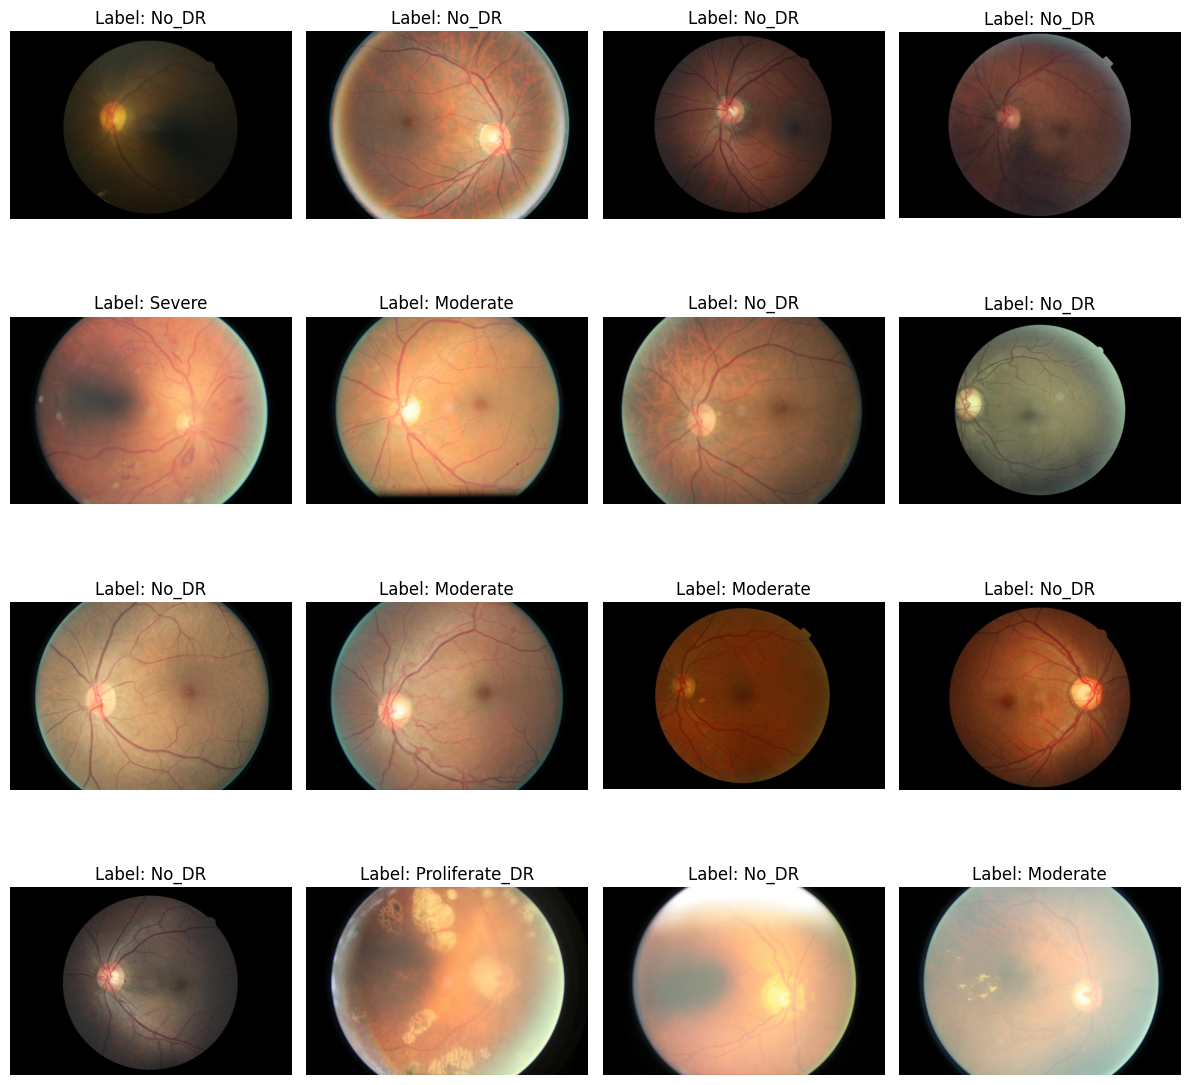

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plot a grid of randomly selected images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, index in enumerate(random_indices):
    row, col = divmod(i, num_cols)
    image_path = df.loc[index, image_column_name]
    label = df.loc[index, label_column_name]

    # Read the image
    img = mpimg.imread(image_path)

    # Display the image with the label
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"Label: {label}")
    axes[row, col].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

The above images of eyes are some random images depicting a normal person and a person suffering from DR (including different stages of DR).

# **Preprocessing**

In [ ]:
# Split into stratified train, validation, and test sets
from sklearn.model_selection import train_test_split

train_intermediate, val = train_test_split(df, test_size = 0.15, stratify = df['type'])
train, test = train_test_split(train_intermediate, test_size = 0.15 / (1 - 0.15), stratify = train_intermediate['type'])

In [ ]:
print("Train Data:",'\n',train['type'].value_counts(), '\n')
print("Test Data:",'\n',test['type'].value_counts(), '\n')
print("Validation Data:",'\n',val['type'].value_counts(), '\n')

Train Data: 
 No_DR             18073
Moderate           3704
Mild               1710
Severe              611
Proliferate_DR      496
Name: type, dtype: int64 

Test Data: 
 No_DR             3874
Moderate           794
Mild               366
Severe             131
Proliferate_DR     106
Name: type, dtype: int64 

Validation Data: 
 No_DR             3873
Moderate           794
Mild               367
Severe             131
Proliferate_DR     106
Name: type, dtype: int64 



## Create working directories for train/validation/test

In [ ]:
base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

## Copy images to respective working directory

In [ ]:
src_dir = r'/content/drive/MyDrive/Diabetic Retinopathy'

In [ ]:
import shutil

for index, row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['image_path']
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [ ]:
for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['image_path']
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [ ]:
for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['image_path']
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [ ]:
# Setting up ImageDataGenerator for train/val/test
from keras.preprocessing.image import ImageDataGenerator

train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 24594 images belonging to 2 classes.
Found 5271 images belonging to 2 classes.
Found 5271 images belonging to 2 classes.


# **Model Building**

In [ ]:
# Convolutional Neural Networks (CNN)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 111, 111, 8)      32        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr = 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc'])

In [ ]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=val_batches)

Epoch 1/10
769/769 [==============================] - 1163s 2s/step - loss: 0.5598 - acc: 0.7374 - val_loss: 0.5618 - val_acc: 0.7346
Epoch 2/10
769/769 [==============================] - 1085s 1s/step - loss: 0.5575 - acc: 0.7372 - val_loss: 0.5624 - val_acc: 0.7357
Epoch 3/10
769/769 [==============================] - 1137s 1s/step - loss: 0.5547 - acc: 0.7392 - val_loss: 0.5628 - val_acc: 0.7338
Epoch 4/10
769/769 [==============================] - 1137s 1s/step - loss: 0.5501 - acc: 0.7401 - val_loss: 0.5631 - val_acc: 0.7357
Epoch 5/10
769/769 [==============================] - 1081s 1s/step - loss: 0.5492 - acc: 0.7417 - val_loss: 0.5591 - val_acc: 0.7386
Epoch 6/10
769/769 [==============================] - 1085s 1s/step - loss: 0.5447 - acc: 0.7428 - val_loss: 0.5597 - val_acc: 0.7363
Epoch 7/10
769/769 [==============================] - 1080s 1s/step - loss: 0.5431 - acc: 0.7442 - val_loss: 0.5601 - val_acc: 0.7327
Epoch 8/10
769/769 [==============================] - 1114s 1s

In [ ]:
model.save('64x3-CNN.model')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('64x3-CNN.model')

In [ ]:
loss, acc = model.evaluate_generator(test_batches, verbose=1)
# print("Loss: ", loss)
print("Accuracy: ", acc)

165/165 [==============================] - 89s 542ms/step - loss: 0.5591 - acc: 0.7369
Accuracy:  0.736862063407898


## Diabet Retinopathy Detection Section

In [ ]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

def predict_class(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("64x3-CNN.model")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('No DR')
    else:
        print('DR')

1/1 [==============================] - 0s 145ms/step
No DR


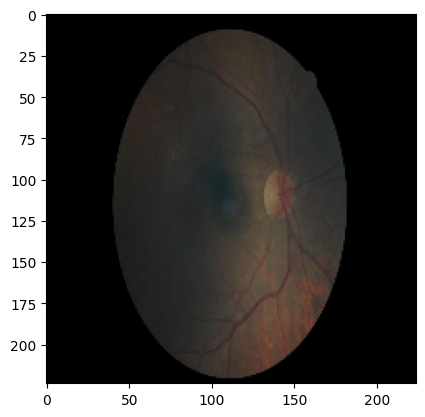

In [ ]:
predict_class('/content/drive/MyDrive/Diabetic Retinopathy/0/10_right.jpeg')

1/1 [==============================] - 0s 133ms/step
No DR


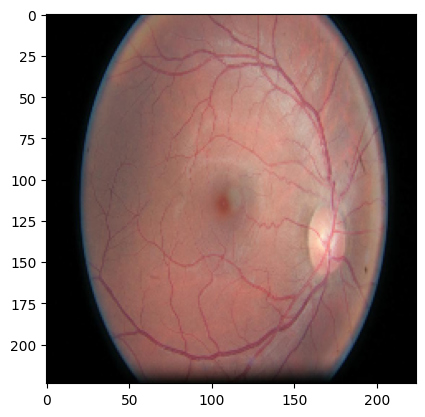

In [ ]:
predict_class('/content/drive/MyDrive/Diabetic Retinopathy/0/56_left.jpeg')

# **Conclusion**
From the above we learn different stages of DR and how can one easily depict whether they have DR or not from the iamges, without involving much resources. Thus, one can easily implement this approach in app or other online services, so that any user using that service can check its initial status of DR without investing much cost.